# Week 01
## 1. Integration Schemes with Python
### Super Simple example

$$\frac{dy(t)}{dt} = - y(t)$$

Determine $y(t)$ for $0 \leq 1 \leq 10$ with IC $y=1$ at $t=0$. Compare with analytical solution $=exp(-t)$.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline

#### Euler Method

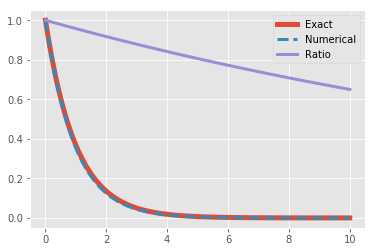

In [30]:
dt, tmin, tmax = 0.1, 0.0, 10.0 # set \Delta t,t0,tmax
step=int((tmax-tmin)/dt)
# create array t from tmin to tmax with equal interval dt 
t  = np.linspace(tmin,tmax,step)
y  = np.zeros(step) # initialize array y as all 0
ya = np.exp(-t) # analytical solution y=exp(-t)

plt.plot(t,ya,label='Exact',lw=5) # plot y vs. t (analytical)

y[0]=1.0 # initial condition
for i in range(step-1):
    y[i+1]=y[i]-dt*y[i] # Euler method Eq.(A8)
plt.plot(t,y,ls='--',lw=3,label='Numerical') # plot y vs t (numerical)
plt.plot(t,y/ya,lw=3,label='Ratio') # plot y/ya vs. t
plt.legend() #display legends
plt.show() #display plots

- the accuracy can be increased by using smaller step size or higher order integration scheme.

#### 2nd Order Runge Kutta Method

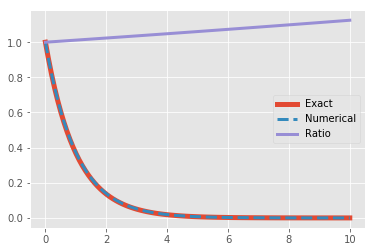

In [36]:
dt, tmin, tmax = 0.1, 0.0, 10.0 # set \Delta t,t0,tmax
step=int((tmax-tmin)/dt)
# create array t from tmin to tmax with equal interval dt 
t  = np.linspace(tmin,tmax,step)
y  = np.zeros(step) # initialize array y as all 0
ya = np.exp(-t) # analytical solution y=exp(-t)

plt.plot(t,ya,label='Exact',lw=5) # plot y vs. t (analytical)

y[0]=1.0 # initial condition
y1 = np.zeros(step)
for i in range(step-1):
    y1[i] = y[i] - 0.5*dt*y[i]
    y[i+1]= y[i] - dt*y1[i]
plt.plot(t,y,ls='--',lw=3,label='Numerical') # plot y vs t (numerical)
plt.plot(t,y/ya,lw=3,label='Ratio') # plot y/ya vs. t
plt.legend() #display legends
plt.show() #display plots

#### 4rd Order Runge Kutta Method

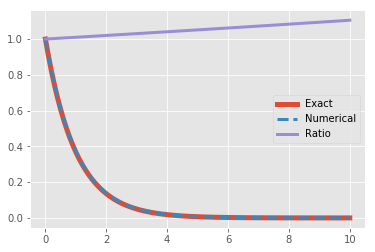

In [38]:
dt, tmin, tmax = 0.1, 0.0, 10.0 # set \Delta t,t0,tmax
step=int((tmax-tmin)/dt)
# create array t from tmin to tmax with equal interval dt 
t  = np.linspace(tmin,tmax,step)
y  = np.zeros(step) # initialize array y as all 0
ya = np.exp(-t) # analytical solution y=exp(-t)

plt.plot(t,ya,label='Exact',lw=5) # plot y vs. t (analytical)

y[0]=1.0 # initial condition
y1 = np.zeros(step) # initialize array y1 as all 0
y2 = np.zeros(step) # initialize array y2 as all 0
y3 = np.zeros(step) # initialize array y3 as all 0

for i in range(step-1):
    y1[i] = y[i] - 0.5*dt*y[i]
    y2[i] = y[i] - 0.5*dt*y1[i]
    y3[i] = y[i] - dt*y2[i]
    y[i+1]= y[i] - dt*(y[i] + 2.0*y1[i] + 2.0*y2[i] + y3[i])/6.0
plt.plot(t,y,ls='--',lw=3,label='Numerical') # plot y vs t (numerical)
plt.plot(t,y/ya,lw=3,label='Ratio') # plot y/ya vs. t
plt.legend() #display legends
plt.show() #display plots

## 3. A damped harmonic oscillator
Time evlotution equations are:
$$\frac{d\mathbf{R}(t)}{dt} = \mathbf{V}(t)$$
$$m\frac{d\mathbf{V}(t)}{dt} = - \zeta \mathbf{V}(t) - k\mathbf{R}(t)$$,
where:

* $k$: spring constant, $m$: particle mass, $\zeta$: friction constant
* $\mathbf{R}(t)$: particle position, $\mathbf{V}(t)$: particle velocity
* $-k\mathbf{R}(t)$: spring force, $\zeta \mathbf{V}(t)$: friction force

This leads to the Euler scheme that is first order in time:
$$\mathbf{R}_{i+1} \approx \mathbf{R}_{i} + \mathbf{V}_i\Delta t$$
$$\mathbf{V}_{i+1} \approx \Big(1-\frac{\zeta}{m}\Delta t\Big) \mathbf{V}_i - \frac{k}{m}\mathbf{R}_i\Delta t$$

The total energy of the oscilator is then:
$$ E_{T}(t) = E_{kinetic}(t) + E_{potential}(t) = \frac{1}{2}m\mathbf{V}(t)^{2} + \frac{1}{2}k\mathbf{R}(t)^{2} $$.

*Note: When considering aharmonic spring the governing equation changes to:*
$$m\frac{d\mathbf{V}(t)}{dt} = - \zeta \mathbf{V}(t) - k\mathbf{R}(t) \mathbf{R}^{2}$$,

Setup environment:

In [53]:
% matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('ggplot')
plt.rcParams['animation.ffmpeg_path'] = "C:\\Users\\marti\\Miniconda2\\envs\\py36\\Library\\bin\\ffmpeg.exe"
mywriter = animation.FFMpegWriter(fps=20)

Define variables:

In [54]:
dim  = 2    # system dimension (x,y)
nums = 300 # number of steps
R    = np.zeros(dim) # particle position
V    = np.zeros(dim) # particle velocity
Rs   = np.zeros([dim,nums]) # particle position (at all steps)
Vs   = np.zeros([dim,nums]) # particle velocity (at all steps)
Et   = np.zeros(nums) # total enegy of the system (at all steps)
time = np.zeros(nums) # time (at all steps)

Define plotting functions:

In [55]:
def init(): # initialize animation
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles,line,title

#### Euler Scheme

In [43]:
def animate(i, type = "harm"): # define amination using Euler
    global R,V,F,Rs,Vs,time,Et
    if type == "aharm":
        F_spring = -k**R *np.linalg.norm(R)**2
        E_spring_aharm = 0.5*np.linalg.norm(R)**2
    else:
        F_spring = -k*R
        E_spring_aharm = 1
        
    V = V*(1-zeta/m*dt) + dt/m*F_spring
    R = R+V*dt # Euler method Eqs.(B3)&(B4)
    Rs[0:dim,i]=R
    Vs[0:dim,i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2 + 0.5*k*np.linalg.norm(R)**2 * E_spring_aharm
    particles.set_data(R[0], R[1])      # current position
    line.set_data(Rs[0,0:i], Rs[1,0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles,line,title

Define parameters:

In [56]:
# System parameters
# particle mass, spring & friction constants
m, k, zeta = 1.0, 1.0, 0.0
# Initial condition
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
dt   = 0.1*np.sqrt(k/m) # set \Delta t

Simulate and plot:

<IPython.core.display.Javascript object>


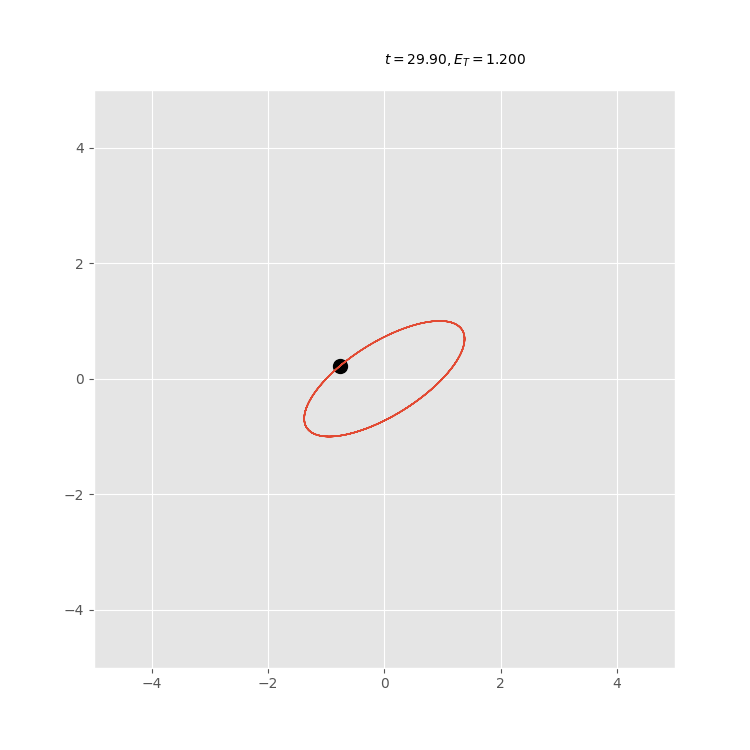

In [45]:
# set up the figure, axis, and plot element for animatation
box  = 10 # set size of draw area
params_model = ("harm", )

fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax = plt.axes(xlim=(-box/2,box/2),ylim=(-box/2,box/2)) # draw range
particles, = ax.plot([],[],'ko', ms=10) # setup plot for particle 
line,=ax.plot([],[],lw=1) # setup plot for trajectry
title=ax.text(0.5,1.05,r'',transform=ax.transAxes,va='center') # title

anim=animation.FuncAnimation(fig,animate,init_func=init,
     frames=nums,interval=5,blit=False,repeat=False, fargs = params_model) # draw animation
#anim.save('movie.mp4', writer = mywriter, dpi = 400)

Temporal values of $R_{x}(t)$, $R_{y}(t)$ and $E_{T}(t)$:

<IPython.core.display.Javascript object>


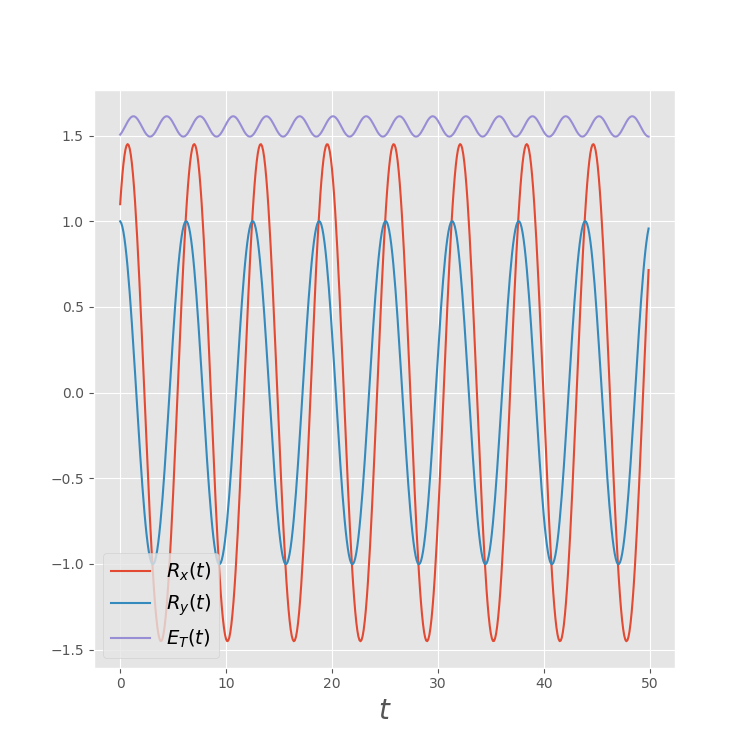

In [15]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time,Rs[0]) # plot R_x(t)
ax.plot(time,Rs[1]) # plot R_y(t)
ax.plot(time,Et) # plot E(t) (ideally constant if \deta=0)
ax.legend([r'$R_x(t)$',r'$R_y(t)$',r'$E_T(t)$'], fontsize=14)
plt.show()

Trajectory plot:

<IPython.core.display.Javascript object>


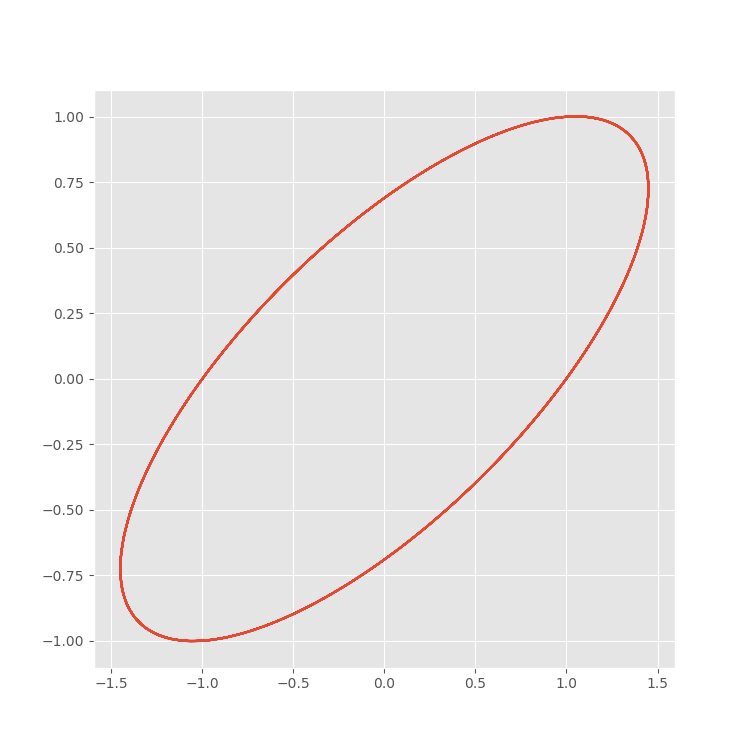

In [16]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.plot(Rs[0,0:nums],Rs[1,0:nums]) # parameteric plot Rx(t) vs. Ry(t)
plt.show()

#### Runge-Kutta 4th Order scheme
update variables:

In [61]:
R1    = np.zeros(dim)
V1    = np.zeros(dim)
R2    = np.zeros(dim)
V2    = np.zeros(dim)
R3    = np.zeros(dim)
V3    = np.zeros(dim)
R4    = np.zeros(dim)
V4    = np.zeros(dim)

update animate function:
$$\mathbf{R}'_{i+1/2} = \mathbf{R}_i + \frac{\Delta t}{2} \mathbf{V}_i$$
$$\mathbf{V}'_{i+1/2} = \mathbf{V_i} - \frac{\zeta}{m} \frac{\Delta t}{2} \mathbf{V}_i - \frac{k}{m}\frac{\Delta t}{2}\mathbf{R}_i$$
The rest is left as an exercies:
$$ (...) $$
$$\mathbf{R}_{i+1} = (...) $$
$$\mathbf{V}_{i+1} = (...) $$

In [62]:
def animate(i, type = "harm"): # define amination using Euler
    global R,V,F,Rs,Vs,time,Et
    
    if type != "harm":
        print("'harm' is the only implemented spring force type")
    
    V1 = V - zeta/m*0.5*dt*V - k/m*0.5*dt*R
    R1 = R + V*0.5*dt
    V2 = V - zeta/m*0.5*dt*V1 - k/m*0.5*dt*R1
    R2 = R + V1*0.5*dt
    V3 = V - zeta/m*dt*V2 - k/m*dt*R2
    R3 = R + V2*dt
    V4 = V - (V+V1*2+V2*2+V3)/6.*zeta/m*dt - k/m*dt*(R+R1*2+R2*2+R3)/6.
    R4 = R + (V+V1*2+V2*2+V3)/6.*dt 
    R  = R4
    V  = V4
    
    Rs[0:dim,i]=R
    Vs[0:dim,i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2 + 0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1])      # current position
    line.set_data(Rs[0,0:i], Rs[1,0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles,line,title

<IPython.core.display.Javascript object>


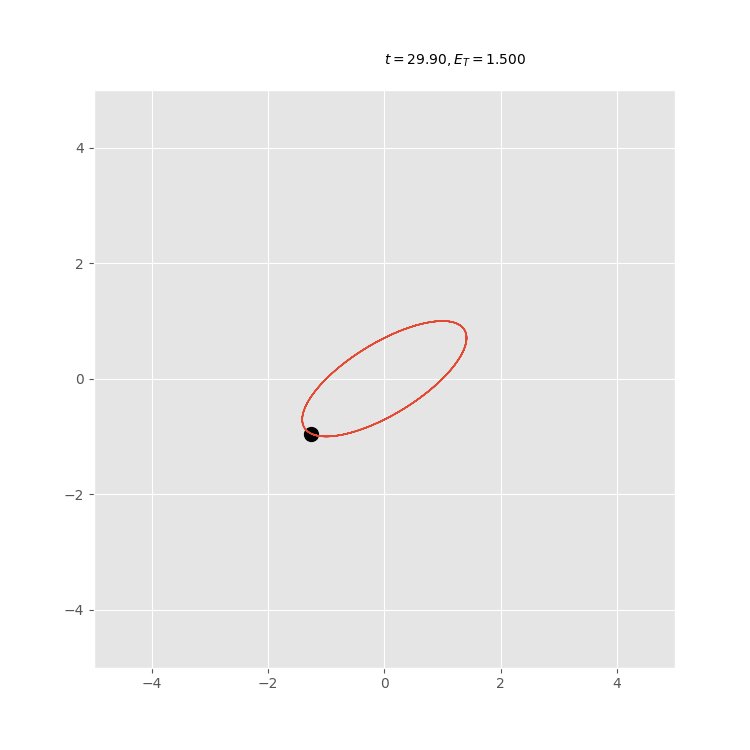

In [63]:
# set up the figure, axis, and plot element for animatation
box  = 10 # set size of draw area
params_model = ("harm", )

fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax = plt.axes(xlim=(-box/2,box/2),ylim=(-box/2,box/2)) # draw range
particles, = ax.plot([],[],'ko', ms=10) # setup plot for particle 
line,=ax.plot([],[],lw=1) # setup plot for trajectry
title=ax.text(0.5,1.05,r'',transform=ax.transAxes,va='center') # title

anim=animation.FuncAnimation(fig,animate,init_func=init,
     frames=nums,interval=5,blit=False,repeat=False, fargs = params_model) # draw animation
#anim.save('movie.mp4', writer = mywriter, dpi = 400)

<IPython.core.display.Javascript object>


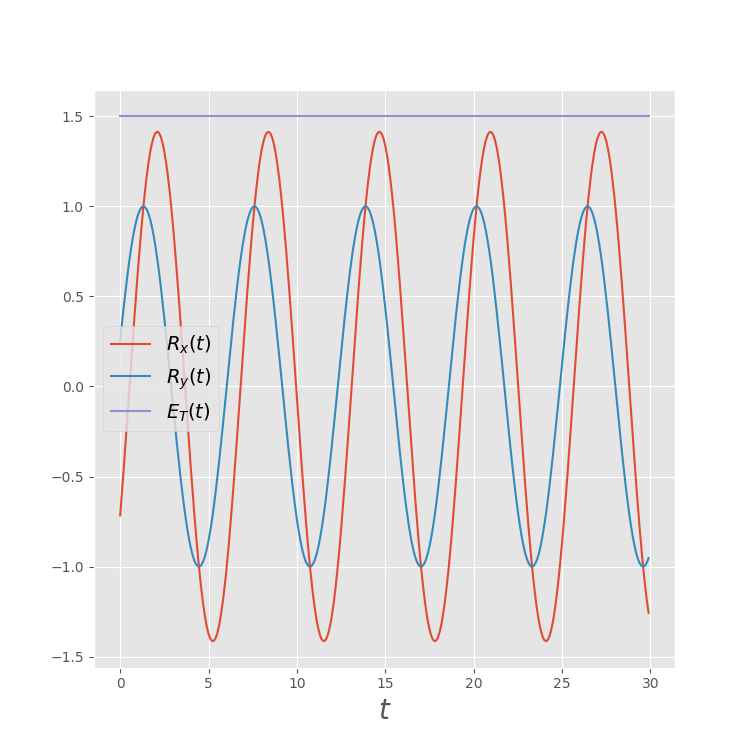

In [64]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time,Rs[0]) # plot R_x(t)
ax.plot(time,Rs[1]) # plot R_y(t)
ax.plot(time,Et) # plot E(t) (ideally constant if \deta=0)
ax.legend([r'$R_x(t)$',r'$R_y(t)$',r'$E_T(t)$'], fontsize=14)
plt.show()